## Set Up

In [3]:
# General Imports
import numpy as np
import pandas as pd
import os
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBClassifier

In [2]:
# Read in sample data
df = pd.read_csv('IPSC_CNN_Class/CNN_Data_Subset.csv')

## Functions

In [4]:
# Create random training set for practice inputs
def rand_ds (num_samples=100, vl=96):
    '''
    Used to generate a practice dataset for testing the XGBoost algorith for the binary classification task.
    :param num_samples: The number of samples in a dataset. In the actual set this is somewhere around 50,000
    :param vl: The length of the 1 dimensional vector. In the actual dataset this is 96000
    :return: Two numpy array, the first is an array of the vectors, the second is an array of the binary response variable.
    '''
    # Create random dataset of the same shape/ verify shape
    X = np.random.uniform(-1, 1, size=(num_samples, vl))

    # Create binary responses for the dataset
    y = np.random.randint(0, 2, size=(num_samples,))

    return X, y

In [33]:
def train_XGB (X, y, best=False):
    '''
    Trains an XGBoost algorithm without hyper-parameter tuning
    :param X: Numpy array of the input features
    :param y: Numpy array of the target results. These should be 0s and 1s.
    :return: Predicted binaries and the y_test set.
    '''

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1341)
    
    # Set parameters/train
    if params == False:
        model = XGBClassifier(random_state=1341, verbosity=2, learning_rate=0.01)
    else:
        model = XGBClassifier(colsample_bytree=0.7,
                                 learning_rate=0.01,
                                 max_depth=5,
                                 min_child_weight=5,
                                 n_estimators=500,
                                 objective='reg:squarederror',
                                  subsample=0.5,
                                 verbosity=2)
    
    # Set up the model/train/record training time
    
    start = time.time()
    model.fit(X_train, y_train)
    tt = time.time() - start

    # Generate predictions
    preds = model.predict(X_test)
    print(tt)
    return model, preds, y_test

## Train Random Dataset for Shape

In [91]:
X, y = rand_ds(100, 4000)

In [103]:
model_1, preds, y_test = train_XGB(X, y)

[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[20:51

[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:51:18] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[20:51

## Train On Real Dataset

First the data is loaded from the previously imported dataframe. The slicing is to take out the unneccesary columns saved in the file.

In [24]:
# Create full sized dataset
X = df.iloc[:,2:4002]
y = df['Labels']

Use the above function to train an XGBoost model on the dataset. It will return predictions and the y test set for validation. 

In [135]:
model_2, preds, y_test = train_XGB(X, y)

[20:59:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=6
[20:59:59] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[21:00:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[21:00:00] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[21:00:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[21:00:01] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[21:00:02] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[21:0

[21:00:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[21:00:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[21:00:46] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[21:00:47] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=6
[21:00:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=6
[21:00:48] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[21:00:49] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6


Now the resulting accuracy will be visualized and investigated

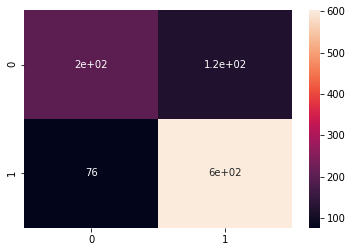

In [141]:

sns.heatmap(confusion_matrix(preds, y_test), annot=True)

In [139]:
accuracy_score(preds, y_test)

0.804

In [143]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.73      0.63      0.67       322
           1       0.83      0.89      0.86       678

    accuracy                           0.80      1000
   macro avg       0.78      0.76      0.77      1000
weighted avg       0.80      0.80      0.80      1000



## Hyperparameter Tuning

In [ ]:
# Create smaller dataset for sample training and hyperparameter tuning
Xs = df.iloc[:500,2:4002]
ys = df['Labels']
ys = ys.iloc[:500]

In [ ]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X, y):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
    
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1341)
    
    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)

    gsearch.fit(X_train, y_train)

    return gsearch.best_params_

In [ ]:
# Print hyperparameters
params = hyperParameterTuning(Xs, ys)
params

## Train Model with Hyperparameters

In [ ]:
model_3, preds, y_test = train_XGB(X, y, True)

In [ ]:
accuracy_score(preds, y_test)

In [ ]:
print(classification_report(preds, y_test))

With a relativly high accuracy of 81% and much lower computational copmlexity, this model warrants training on the larger dataset.

In [ ]:
model_3.save_model('XGB_IPSC_Hyp.model')

In [25]:
model_3.save_model('XGB_IPSC_Hyp.model')

In [9]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X, y):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
    
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1341)
    
    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)

    gsearch.fit(X_train, y_train)

    return gsearch.best_params_

In [18]:
# Print hyperparameters
params = hyperParameterTuning(Xs, ys)
params

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 68.7min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 71.4min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

## Train Model with Hyperparameters

In [34]:
model_3, preds, y_test = train_XGB(X, y, True)

[15:12:55] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:12:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:12:56] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:12:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:12:57] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:12:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:12:58] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:12

[15:13:32] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:13:32] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:13:33] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:13:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[15:13:34] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[15:13:35] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:13:36] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[15:13

[15:14:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:14:08] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:14:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[15:14:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:14:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[15:14:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[15:14:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:14

[15:14:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[15:14:40] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:14:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:14:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:14:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[15:14:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:14:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:14

[15:15:09] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:15:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:15:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=5
[15:15:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:15:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:15:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[15:15:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:15

[15:15:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:15:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=5
[15:15:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[15:15:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:15:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[15:15:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[15:15:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:15

[15:16:10] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:16:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[15:16:11] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[15:16:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[15:16:12] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:16:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:16:13] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[15:16

[15:16:41] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[15:16:42] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[15:16:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[15:16:43] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=5
[15:16:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:16:44] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:16:45] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:16

[15:17:20] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[15:17:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[15:17:21] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[15:17:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:17:22] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:17:23] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[15:17:24] INFO: /Users/travis/build/dmlc/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[15:17

In [28]:
accuracy_score(preds, y_test)

0.813

In [30]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       293
           1       0.86      0.88      0.87       707

    accuracy                           0.81      1000
   macro avg       0.78      0.77      0.77      1000
weighted avg       0.81      0.81      0.81      1000



With a relativly high accuracy of 81% and much lower computational complexity, this model warrants training on the larger dataset.

In [2]:
model_3.save_model('XGB_IPSC_Hyp.model')

NameError: name 'model_3' is not defined

In [4]:
full = pd.read_csv('IPSC_CNN_Class/CNN_Labels.csv')

In [6]:
full.shape

(125035, 4004)

In [7]:
y = full['Labels']

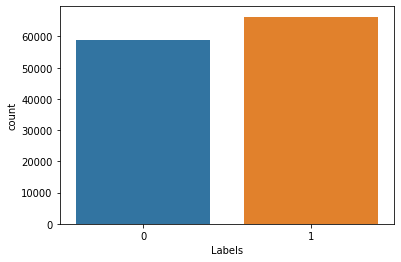

In [8]:
sns.countplot(y)